# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())


720


In [4]:
#  2. Modify our df to have all duplicate rows removed. 

print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(11914, 15)
(11194, 15)


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print(df.duplicated().sum())

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?

df.isna()
df.isna().sum()
# Answer - Engine HP 69

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [7]:
# * Print how long our dataframe is.
len(df)


11194

In [8]:
# * Remove any row that has a null value in it. 
df.dropna(inplace = True)
df = df.dropna()

In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

len(df)

11092

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

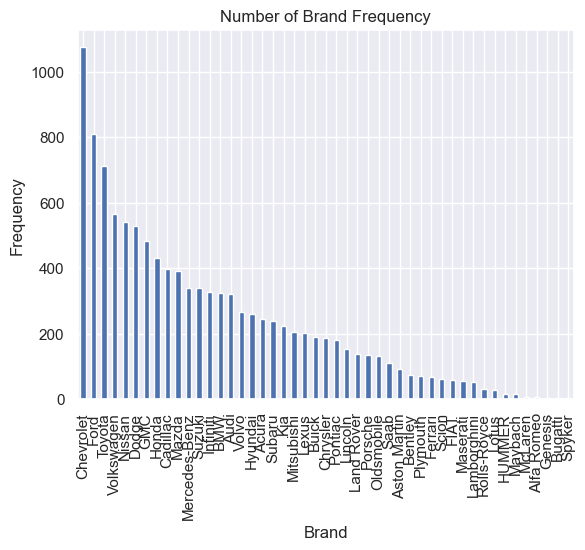

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
freq = df['Make'].value_counts()
freq.plot(kind = 'bar')
plt.title('Number of Brand Frequency')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

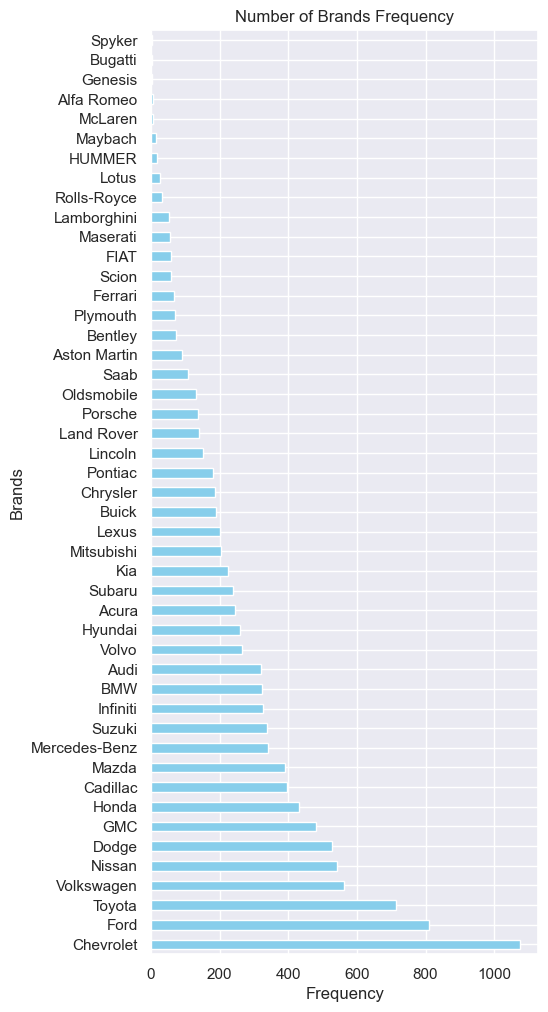

In [11]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
freq = freq.sort_values(ascending= False)
plt.figure(figsize=(5, 12)) 
freq.plot(kind = 'barh', color='skyblue')
plt.title('Number of Brands Frequency')
plt.xlabel('Frequency')
plt.ylabel('Brands')
plt.show()

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


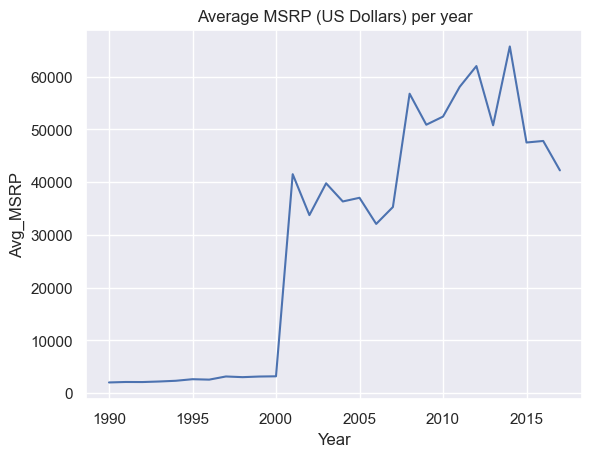

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
Avg_MSRP = df.groupby('Year')['MSRP'].mean().reset_index()
Avg_MSRP = Avg_MSRP.rename(columns={'MSRP': 'Avg_MSRP'})
#print(df.head())
#print(Avg_MSRP.head())
sns.lineplot(data=Avg_MSRP,
             x='Year',
             y='Avg_MSRP')
plt.title('Average MSRP (US Dollars) per year')
plt.show()
#The error here was giving me that: it was returning in a pandas series and was unable to convert it to a dataframe

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [13]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price'] = np.where(df['Year'] <= 2000, df['MSRP'] * 10, df['MSRP'])

print(df.head())



  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  \
0      Compact         Coupe           26        19        3

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

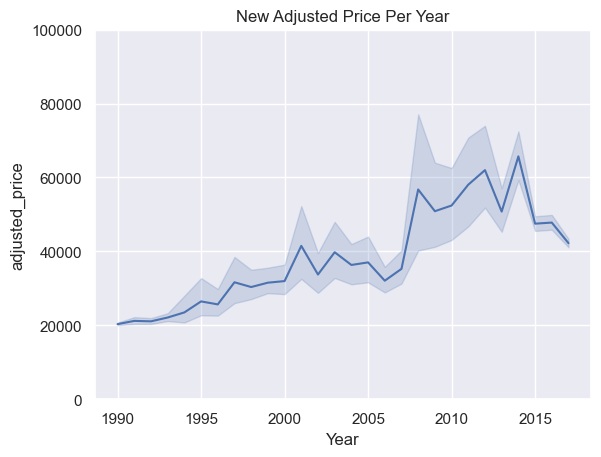

In [14]:
# Plot new prices

sns.lineplot(data=df, x='Year', y='adjusted_price')
plt.ylim(0, 100000)
plt.title('New Adjusted Price Per Year')
plt.show()


# Plot the relationship between Engine HP and highway MPG

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


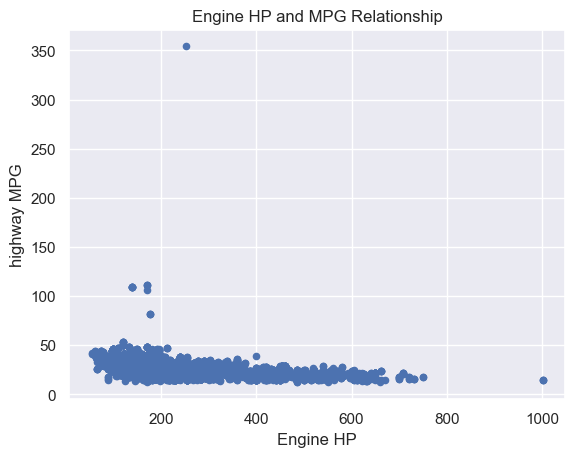

In [15]:
# Plot the relationship between Engine HP and highway MPG
df.plot(kind = 'scatter', 
        x='Engine HP',
        y='highway MPG');

plt.title('Engine HP and MPG Relationship')
plt.show()

In [16]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
select_condition = df['Engine HP'] < 750

df = df[select_condition]
select_condition2 = df['highway MPG'] < 80

df = df[select_condition2]

# Replot the relationship between Engine HP and highway MPG


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Engine HP and MPG Relationship')

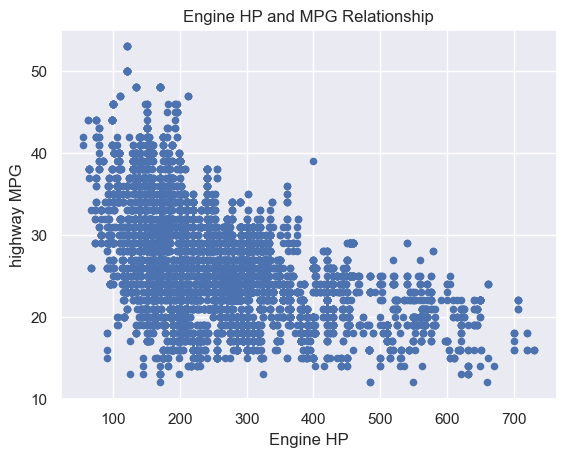

In [17]:
# Re-Plot the relationship between Engine HP and highway MPG
df.plot(kind = 'scatter', 
        x='Engine HP', 
        y='highway MPG');

plt.title('Engine HP and MPG Relationship')

# Make a scatter plot of Engine HP vs highway MPG

Text(0.5, 1.0, 'Engine HP and MPG Relationship')

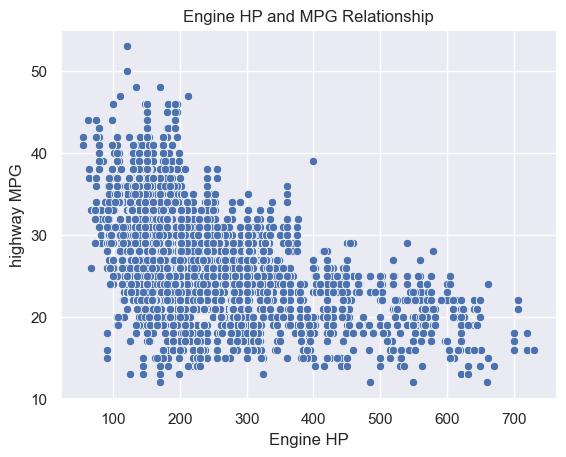

In [18]:
# Make a scatter plot of Engine HP vs highway MPG
sns.scatterplot(data=df, 
                x='Engine HP', 
                y='highway MPG');

plt.title('Engine HP and MPG Relationship')

# What does this plot tell you about how Engine HP affects highway MPG?

In [19]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Negetive relationship between two. If the Engine HP decreases the highway MPG increases.')

Negetive relationship between two. If the Engine HP decreases the highway MPG increases.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

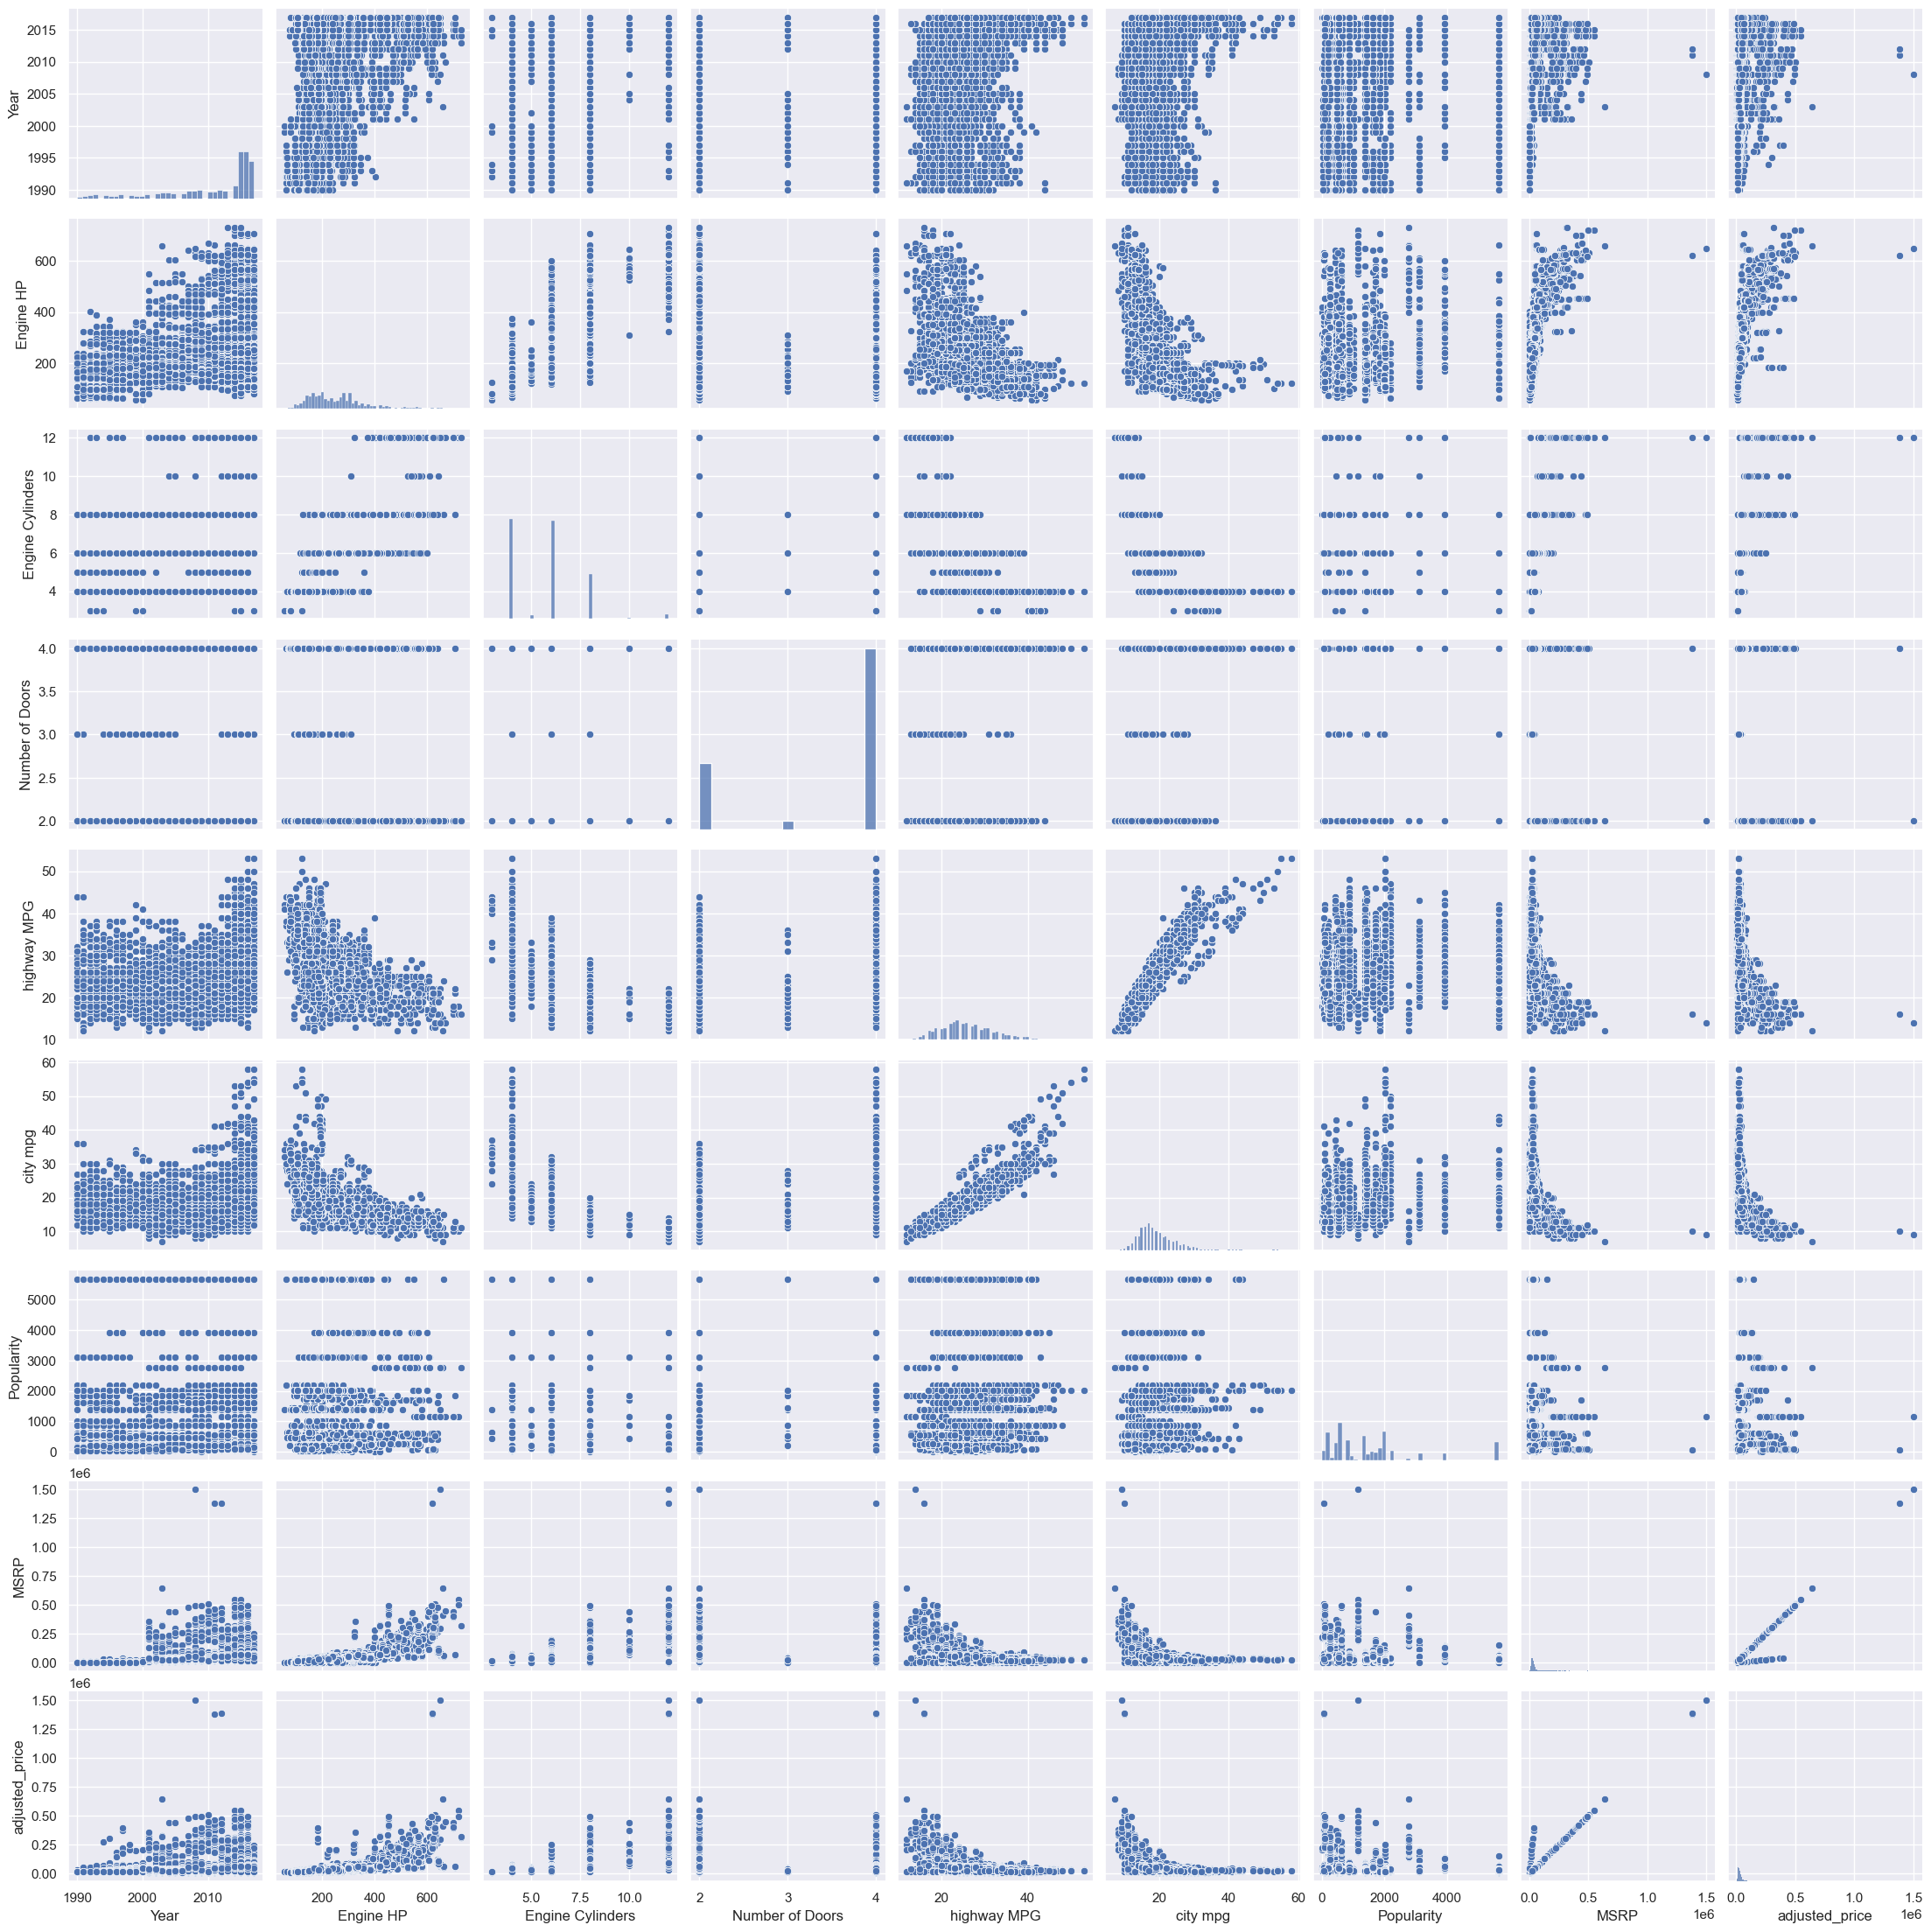

In [20]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df);

In [21]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,adjusted_price
Year,1.000000,0.340931,-0.024544,0.245634,0.303710,0.246007,0.086403,0.239315,0.130670
Engine HP,0.340931,1.000000,0.787493,-0.124848,-0.493474,-0.542755,0.043168,0.688562,0.666410
Engine Cylinders,-0.024544,0.787493,1.000000,-0.143612,-0.688431,-0.686319,0.045162,0.577448,0.592497
Number of Doors,0.245634,-0.124848,-0.143612,1.000000,0.126524,0.147932,-0.059880,-0.148622,-0.192355
highway MPG,0.303710,-0.493474,-0.688431,0.126524,1.000000,0.918855,-0.040528,-0.262021,-0.298398
city mpg,0.246007,-0.542755,-0.686319,0.147932,0.918855,1.000000,-0.017731,-0.289956,-0.319691
Popularity,0.086403,0.043168,0.045162,-0.059880,-0.040528,-0.017731,1.000000,-0.050261,-0.051858
MSRP,0.239315,0.688562,0.577448,-0.148622,-0.262021,-0.289956,-0.050261,1.000000,0.980349
adjusted_price,0.130670,0.666410,0.592497,-0.192355,-0.298398,-0.319691,-0.051858,0.980349,1.000000


In [22]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('All strongest linear relationships:')
var1 = 'highway MPG and city mpg |'
var2 = 'Popularity and Year |'
var3 = 'Engine Cylinders and Engine HP'
print(var1,var2,var3)

All strongest linear relationships:
highway MPG and city mpg | Popularity and Year | Engine Cylinders and Engine HP


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

<AxesSubplot:>

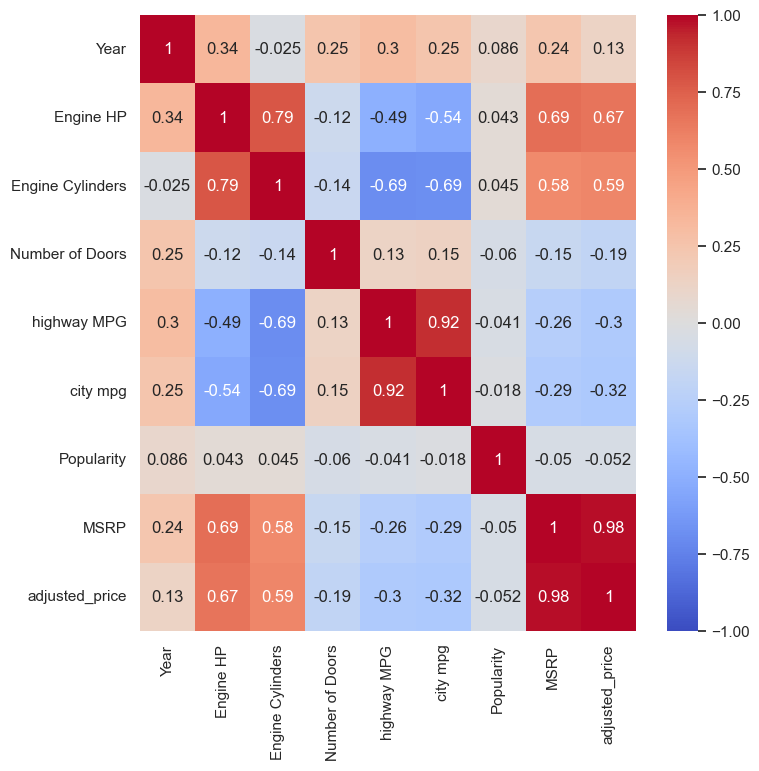

In [23]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

correlations = df.corr() 
plt.figure(figsize=(8, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [24]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has strong positive relationship with Engine Cylinders.\nThe reason is the higher Engine Horse Power indicates the higher engine cylinder volume.')

Engine HP has strong positive relationship with Engine Cylinders.
The reason is the higher Engine Horse Power indicates the higher engine cylinder volume.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




In [25]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

print(df.head())

  make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  vehicle_size vehicle_style  highway_mpg  city_mpg  popularity   msrp  \
0      Compact         Coupe           26        19        3